In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def report(score_map, score_name, a, b, c):
    a_scores = score_map[a[0], a[1], a[2]][score_name]
    b_scores = score_map[b[0], b[1], b[2]][score_name]
    c_scores = score_map[c[0], c[1], c[2]][score_name]
    result = stats.ttest_rel(a_scores, b_scores)
    print("base: %0.04f(%0.04f)" % (np.mean(a_scores), np.std(a_scores)),
          "ours: %0.04f(%0.04f)" % (np.mean(b_scores), np.std(b_scores)))
    print("p-value: %0.04f" % result[1])
    print("text: %0.04f(%0.04f)" % (np.mean(c_scores), np.std(c_scores)))


score_map = pd.read_pickle('./data/total_score_map')
names = ['nn', 'rf', 'lr']
opts = ['base', 'ours', 'text']
terms = [1, 2, 3, 4]

In [3]:
score_name = 'f1-score'
for name in names:
    print("=========================%s=========================" % name)
    for term in terms:
        print("==========%d============" % term)
        argses = tuple((name, opt, term) for opt in opts)
        report(score_map, score_name, *argses)

=========================nn=========================
==========1============
base: 0.7332(0.1430) ours: 0.6455(0.2297)
p-value: 0.0002
text: 0.4849(0.2133)
==========2============
base: 0.8067(0.0873) ours: 0.7966(0.0903)
p-value: 0.2118
text: 0.6039(0.1934)
==========3============
base: 0.8877(0.1067) ours: 0.9344(0.0770)
p-value: 0.0000
text: 0.6821(0.1809)
==========4============
base: 0.8885(0.0937) ours: 0.9061(0.0829)
p-value: 0.0003
text: 0.7360(0.1416)
=========================rf=========================
==========1============
base: 0.8937(0.1121) ours: 0.9259(0.0799)
p-value: 0.0000
text: 0.3263(0.2140)
==========2============
base: 0.9239(0.0821) ours: 0.9235(0.0868)
p-value: 0.8962
text: 0.3958(0.2022)
==========3============
base: 0.9153(0.0923) ours: 0.9127(0.1095)
p-value: 0.6409
text: 0.4102(0.2091)
==========4============
base: 0.9042(0.1249) ours: 0.8971(0.1380)
p-value: 0.3239
text: 0.3832(0.2006)
=========================lr=========================
==========1======

In [4]:
df = pd.DataFrame([score_map['nn', opt, 3]['f1-score'] for opt in opts]).T
df.columns = opts
np.random.seed(0)
df.apply(lambda x: round(x, 4)).iloc[np.random.choice(100, 20, replace=False)+1]

,base,ours,text
27,0.9091,0.9091,0.9091
87,0.8333,0.9091,0.8000
3,0.7143,0.7143,0.6154
56,1.0000,1.0000,0.9091
76,1.0000,1.0000,0.4615
94,0.8000,0.9091,1.0000
17,0.7273,0.8333,0.6000
74,0.7273,0.8333,0.6667
55,0.8333,0.8333,0.6667
96,0.8333,0.9091,0.2500


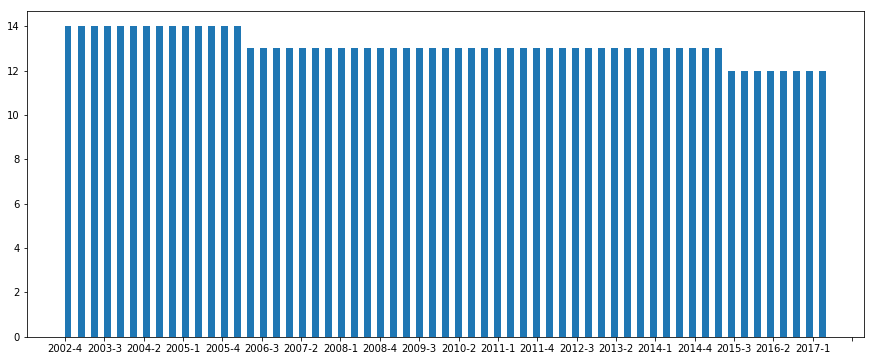

In [5]:
df = pd.read_csv('./data/Structured&Unstructured_bank.csv', encoding='cp949')
ms = [str(v) for v in df['날짜']]
qs = [''.join([v[:4], '-', {'03': '1', '06': '2', '09': '3', '12': '4'}[v[-2:]]]) for v in ms]
plt.figure(num=None, figsize=(15, 6), facecolor='w', edgecolor='k')
plt.xticks([i for i in range(len(qs)) if i % 3 == 0])
plt.hist(sorted(qs), bins=117)
plt.show()